In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2019, 7, 8, 15, 26, 29, 593471)

### Tipos de dados e ferramentas para data e hora

In [5]:
now.year, now.month, now.day

(2019, 7, 8)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
datetime(2011, 1, 19, 0, 0)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Conversão entre string e datetime

In [15]:
stamp = datetime(2011, 1, 3)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [18]:
stamp.strftime('%d-%m-%Y')

'03-01-2011'

In [19]:
value = '2011-01-03'

In [20]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
datestrs = ['7/6/2011', '8/6/2011']

In [22]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
from dateutil.parser import parse

In [24]:
parse('2011-01-03') # Funciona com qualquer formato de data

datetime.datetime(2011, 1, 3, 0, 0)

###### dateutil é capaz de fazer parse da maior parte das representações de data legiveis aos seres humanos

In [25]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [26]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [27]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [28]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA

In [29]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [30]:
idx = pd.to_datetime(datestrs + [None])

In [31]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [32]:
idx[2]

NaT

In [33]:
pd.isnull(idx)

array([False, False,  True])

##### Básico sobre séries temporais

In [34]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts

2011-01-02    1.117886
2011-01-05   -0.826850
2011-01-07   -0.209456
2011-01-08   -0.638969
2011-01-10    1.106323
2011-01-12   -0.648791
dtype: float64

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts + ts[::2]

2011-01-02    2.235772
2011-01-05         NaN
2011-01-07   -0.418912
2011-01-08         NaN
2011-01-10    2.212646
2011-01-12         NaN
dtype: float64

In [39]:
ts.index.dtype

dtype('<M8[ns]')

In [40]:
stamp = ts.index[0]

In [41]:
stamp

Timestamp('2011-01-02 00:00:00')

### Indexação, seleção e geração de subconjuntos

In [42]:
stamp = ts.index[2]

In [43]:
ts[stamp]

-0.2094560931550445

In [44]:
ts['1/10/2011']

1.106322799248137

In [45]:
ts['20110110']

1.106322799248137

In [46]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [47]:
longer_ts

2000-01-01    0.213460
2000-01-02    0.285443
2000-01-03   -0.419523
2000-01-04   -0.254612
2000-01-05   -0.664277
2000-01-06   -0.208870
2000-01-07   -1.223939
2000-01-08   -0.434362
2000-01-09   -1.408617
2000-01-10   -0.546854
2000-01-11   -2.292833
2000-01-12    1.900973
2000-01-13   -0.292338
2000-01-14   -0.361127
2000-01-15   -1.272458
2000-01-16   -1.011148
2000-01-17   -0.679516
2000-01-18    0.068464
2000-01-19    1.388681
2000-01-20    0.719550
2000-01-21    0.690113
2000-01-22   -0.557411
2000-01-23    0.201441
2000-01-24   -1.201665
2000-01-25   -2.163079
2000-01-26   -0.127972
2000-01-27   -0.762522
2000-01-28   -0.119618
2000-01-29    0.719329
2000-01-30    0.337777
                ...   
2002-08-28   -1.289156
2002-08-29   -0.884916
2002-08-30    0.766495
2002-08-31   -1.333682
2002-09-01    0.644395
2002-09-02   -1.833899
2002-09-03   -0.183915
2002-09-04    0.560976
2002-09-05   -0.380496
2002-09-06    0.238718
2002-09-07   -0.193758
2002-09-08   -0.996041
2002-09-09 

In [48]:
longer_ts['2001']

2001-01-01   -0.647533
2001-01-02   -1.025064
2001-01-03   -0.287690
2001-01-04    0.927940
2001-01-05    0.218989
2001-01-06    1.174485
2001-01-07    0.748209
2001-01-08    0.080597
2001-01-09   -1.201832
2001-01-10   -1.078775
2001-01-11    1.171782
2001-01-12    0.142991
2001-01-13    0.490711
2001-01-14    1.611590
2001-01-15   -1.549306
2001-01-16    1.401720
2001-01-17    0.981946
2001-01-18    0.731711
2001-01-19    0.650080
2001-01-20    0.880615
2001-01-21    0.584665
2001-01-22   -0.694676
2001-01-23    0.122846
2001-01-24   -0.195836
2001-01-25   -1.550787
2001-01-26    0.814432
2001-01-27    1.123514
2001-01-28    2.013279
2001-01-29    1.196503
2001-01-30    0.125979
                ...   
2001-12-02   -0.506075
2001-12-03    1.900714
2001-12-04   -0.674340
2001-12-05    1.051100
2001-12-06    1.688810
2001-12-07   -1.331005
2001-12-08   -1.763333
2001-12-09    0.215048
2001-12-10    0.243976
2001-12-11    0.499394
2001-12-12    0.900453
2001-12-13    0.041828
2001-12-14 

In [49]:
longer_ts['2001-05']

2001-05-01   -2.110226
2001-05-02    0.533810
2001-05-03   -0.234710
2001-05-04   -0.208883
2001-05-05   -0.686237
2001-05-06    0.013296
2001-05-07    0.962401
2001-05-08    1.065436
2001-05-09    0.098384
2001-05-10   -0.368369
2001-05-11    0.917319
2001-05-12    0.068789
2001-05-13    0.014678
2001-05-14    0.354823
2001-05-15   -1.127999
2001-05-16   -1.241618
2001-05-17   -0.265199
2001-05-18    1.264847
2001-05-19   -0.911201
2001-05-20    0.022679
2001-05-21    0.042155
2001-05-22   -1.601661
2001-05-23    0.521504
2001-05-24   -0.176148
2001-05-25   -0.838863
2001-05-26   -1.066038
2001-05-27    0.418735
2001-05-28    1.269300
2001-05-29    1.058708
2001-05-30   -0.783358
2001-05-31    0.516379
Freq: D, dtype: float64

In [50]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.209456
2011-01-08   -0.638969
2011-01-10    1.106323
2011-01-12   -0.648791
dtype: float64

In [51]:
ts

2011-01-02    1.117886
2011-01-05   -0.826850
2011-01-07   -0.209456
2011-01-08   -0.638969
2011-01-10    1.106323
2011-01-12   -0.648791
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.209456
2011-01-08   -0.638969
2011-01-10    1.106323
dtype: float64

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02    1.117886
2011-01-05   -0.826850
2011-01-07   -0.209456
2011-01-08   -0.638969
dtype: float64

In [54]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [55]:
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [56]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.179844,-1.891786,0.148994,1.111207
2000-01-12,1.073118,0.980060,-0.865559,0.218468
2000-01-19,0.188019,-1.869142,-0.502066,-0.013775
2000-01-26,1.983439,0.701058,2.537430,0.128249
2000-02-02,-0.841586,-0.274975,-0.558733,-2.004556
2000-02-09,0.492872,0.775277,-1.050485,-1.948751
2000-02-16,-0.250803,0.773156,-0.839194,-0.187704
2000-02-23,0.936626,-0.228948,0.076821,-0.137527
2000-03-01,-0.410099,-0.855593,-1.580439,-0.231510
2000-03-08,0.964423,-0.720661,0.137836,0.294474


In [57]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.471927,-0.196770,0.751965,-0.164571
2001-05-09,-0.013023,-1.764255,-1.552690,-0.650441
2001-05-16,1.723477,-0.153397,1.312088,0.195041
2001-05-23,0.049481,0.408776,0.732621,-1.042815
2001-05-30,0.012753,-0.054111,0.286057,2.531830


<p style="color:blue; font-size:18px;">Séries temporais com índices duplicados</p>

In [58]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                     '1/2/2000', '1/3/2000'])

In [59]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [60]:
dup_ts.index.is_unique

False

In [61]:
dup_ts['1/3/2000'] # não duplicado

4

In [62]:
dup_ts['1/2/2000'] #duplicado

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [63]:
grouped = dup_ts.groupby(level=0)

In [64]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [65]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

<p style="color:blue; font-size:18px;">Intervalos de datas, frequências e deslocamentos</p>

In [66]:
ts

2011-01-02    1.117886
2011-01-05   -0.826850
2011-01-07   -0.209456
2011-01-08   -0.638969
2011-01-10    1.106323
2011-01-12   -0.648791
dtype: float64

In [67]:
resampler = ts.resample('D')

<p style="color:blue; font-size:18px;">Gerando intervalos de datas</p>

In [68]:
index = pd.date_range('2012-04-01', '2012-06-01' )

In [69]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [70]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [73]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [74]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

<p style="color:blue; font-size:18px;">Frequências e offset de datas</p>

In [75]:
from pandas.tseries.offsets import Hour, Minute

In [76]:
hour = Hour()
hour

<Hour>

In [77]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [78]:
pd.date_range('2001-01-01', '2001-01-03 23:59', freq='4h')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 04:00:00',
               '2001-01-01 08:00:00', '2001-01-01 12:00:00',
               '2001-01-01 16:00:00', '2001-01-01 20:00:00',
               '2001-01-02 00:00:00', '2001-01-02 04:00:00',
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

In [80]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

<p style="color:blue; font-size:14px;">Datas com a semana do mês</p>

In [81]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

<p style="color:blue; font-size:18px;">Deslocamento de datas(Adiantando e atrasando)</p>

In [83]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [84]:
ts

2000-01-31    0.778217
2000-02-29   -1.410520
2000-03-31    1.616610
2000-04-30   -1.412983
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.778217
2000-04-30   -1.410520
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31    1.616610
2000-02-29   -1.412983
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [87]:
ts.shift(2, freq='M')

2000-03-31    0.778217
2000-04-30   -1.410520
2000-05-31    1.616610
2000-06-30   -1.412983
Freq: M, dtype: float64

In [88]:
ts.shift(3, freq='D')

2000-02-03    0.778217
2000-03-03   -1.410520
2000-04-03    1.616610
2000-05-03   -1.412983
dtype: float64

In [89]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.778217
2000-02-29 01:30:00   -1.410520
2000-03-31 01:30:00    1.616610
2000-04-30 01:30:00   -1.412983
Freq: M, dtype: float64

<p style="color:blue; font-size:18px;">Deslocamento de datas com offsets</p>
<p style="color:red; font-size:10px;">pg 411</p>

In [90]:
from pandas.tseries.offsets import Day, MonthEnd

In [91]:
now = datetime(2011, 11, 17)

In [92]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [93]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [94]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [95]:
offset = MonthEnd()

In [96]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [97]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [98]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [99]:
ts

2000-01-15   -1.231178
2000-01-19    0.129627
2000-01-23    0.829234
2000-01-27   -0.258663
2000-01-31   -0.643263
2000-02-04    1.070066
2000-02-08   -0.667897
2000-02-12    0.256296
2000-02-16   -1.134145
2000-02-20    0.432981
2000-02-24   -0.685664
2000-02-28    1.155972
2000-03-03   -0.835249
2000-03-07    0.690320
2000-03-11    1.264485
2000-03-15   -1.202601
2000-03-19   -0.029935
2000-03-23    0.841773
2000-03-27    2.224416
2000-03-31   -1.398528
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.234848
2000-02-29    0.061087
2000-03-31    0.194335
dtype: float64

In [101]:
ts.resample('M').mean()

2000-01-31   -0.234848
2000-02-29    0.061087
2000-03-31    0.194335
Freq: M, dtype: float64

In [102]:
import pytz

In [103]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
tz = pytz.timezone('America/New_York')

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

<p style="color:blue; font-size:18px;">Localização e conversão dos fusos horários</p>
<p style="color:red; font-size:10px;">pg 414</p>

In [106]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [108]:
ts

2012-03-09 09:30:00   -0.001918
2012-03-10 09:30:00   -0.494703
2012-03-11 09:30:00   -0.017077
2012-03-12 09:30:00    0.546117
2012-03-13 09:30:00    0.207323
2012-03-14 09:30:00    1.427859
Freq: D, dtype: float64

In [109]:
print(ts.index.tz)

None


In [110]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [111]:
ts

2012-03-09 09:30:00   -0.001918
2012-03-10 09:30:00   -0.494703
2012-03-11 09:30:00   -0.017077
2012-03-12 09:30:00    0.546117
2012-03-13 09:30:00    0.207323
2012-03-14 09:30:00    1.427859
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00   -0.001918
2012-03-10 09:30:00+00:00   -0.494703
2012-03-11 09:30:00+00:00   -0.017077
2012-03-12 09:30:00+00:00    0.546117
2012-03-13 09:30:00+00:00    0.207323
2012-03-14 09:30:00+00:00    1.427859
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.001918
2012-03-10 04:30:00-05:00   -0.494703
2012-03-11 05:30:00-04:00   -0.017077
2012-03-12 05:30:00-04:00    0.546117
2012-03-13 05:30:00-04:00    0.207323
2012-03-14 05:30:00-04:00    1.427859
Freq: D, dtype: float64

In [116]:
 ts_eastern = ts.tz_localize('America/New_York')

In [117]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.001918
2012-03-10 15:30:00+01:00   -0.494703
2012-03-11 14:30:00+01:00   -0.017077
2012-03-12 14:30:00+01:00    0.546117
2012-03-13 14:30:00+01:00    0.207323
2012-03-14 14:30:00+01:00    1.427859
Freq: D, dtype: float64

In [117]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

<p style="color:blue; font-size:18px;">Operações com objetos Timestamp que consideram fusos horários</p>
<p style="color:red; font-size:10px;">pg 417</p>

In [118]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [119]:
stamp_utc = stamp.tz_localize('utc')

In [120]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [121]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [122]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [123]:
stamp_utc.value

1299902400000000000

In [124]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [125]:
from pandas.tseries.offsets import Hour

In [126]:
stamp = pd.Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [127]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [128]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [129]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [130]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [131]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

<p style="color:blue; font-size:18px;">Operações entre fusos horários diferentes</p>
<p style="color:red; font-size:10px;">pg 418</p>

In [132]:
rng = pd.date_range('3/7/2012 09:30', periods=10, freq='B')

In [133]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [134]:
ts

2012-03-07 09:30:00   -0.724120
2012-03-08 09:30:00   -1.011030
2012-03-09 09:30:00   -0.946199
2012-03-12 09:30:00   -1.918024
2012-03-13 09:30:00    0.634663
2012-03-14 09:30:00   -0.397561
2012-03-15 09:30:00    0.467241
2012-03-16 09:30:00   -0.894440
2012-03-19 09:30:00   -0.458609
2012-03-20 09:30:00   -0.702037
Freq: B, dtype: float64

In [135]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.724120
2012-03-08 09:30:00+00:00   -1.011030
2012-03-09 09:30:00+00:00   -0.946199
2012-03-12 09:30:00+00:00   -1.918024
2012-03-13 09:30:00+00:00    0.634663
2012-03-14 09:30:00+00:00   -0.397561
2012-03-15 09:30:00+00:00    0.467241
Freq: B, dtype: float64

In [136]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.946199
2012-03-12 13:30:00+04:00   -1.918024
2012-03-13 13:30:00+04:00    0.634663
2012-03-14 13:30:00+04:00   -0.397561
2012-03-15 13:30:00+04:00    0.467241
Freq: B, dtype: float64

In [137]:
result = ts1 + ts2

In [138]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

<p style="color:blue; font-size:18px;">Períodos e aritmética com períodos</p>
<p style="color:red; font-size:10px;">pg 419</p>

In [139]:
p = pd.Period(2007, freq='A-DEC')

In [140]:
p

Period('2007', 'A-DEC')

In [141]:
p + 5

Period('2012', 'A-DEC')

In [142]:
p - 2

Period('2005', 'A-DEC')

In [143]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [144]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [145]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [146]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.737478
2000-02   -0.756060
2000-03    0.272292
2000-04   -0.835025
2000-05   -0.190714
2000-06    0.360462
Freq: M, dtype: float64

In [147]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [148]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [149]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

<p style="color:blue; font-size:18px;">Conversão de frequência de períodos</p>
<p style="color:red; font-size:10px;">pg 420</p>

In [150]:
p = pd.Period('2007', freq='A-DEC')

In [151]:
p

Period('2007', 'A-DEC')

In [152]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [153]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [154]:
p = pd.Period('Aug-2007', 'M')

In [155]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [156]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [157]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [158]:
ts

2006    0.726951
2007   -0.182219
2008    0.353752
2009   -0.635277
Freq: A-DEC, dtype: float64

In [159]:
ts.asfreq('M', how='start')

2006-01    0.726951
2007-01   -0.182219
2008-01    0.353752
2009-01   -0.635277
Freq: M, dtype: float64

<p style="color:blue; font-size:18px;">Frequência de período trimestrais</p>
<p style="color:red; font-size:10px;">pg 422</p>

In [160]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [161]:
p

Period('2012Q4', 'Q-JAN')

In [162]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [163]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [164]:
p4pm = (p.asfreq('B', 'e') -1).asfreq('T', 's') + 16 * 60

In [165]:
p4pm

Period('2012-01-30 16:00', 'T')

In [166]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [167]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [168]:
ts

2006    0
2007    1
2008    2
2009    3
Freq: A-DEC, dtype: int32

In [169]:
new_rng = (rng.asfreq('B', 'e') -1 ).asfreq('T', 's') + 16 * 60

In [170]:
ts.index = new_rng.to_timestamp()

In [171]:
ts

2006-12-28 16:00:00    0
2007-12-28 16:00:00    1
2008-12-30 16:00:00    2
2009-12-30 16:00:00    3
dtype: int32

<p style="color:blue; font-size:18px;">Convertendo timestamps para vários peripos (e vice-versa)</p>
<p style="color:red; font-size:10px;">pg 424</p>

In [172]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [173]:
ts = pd.Series(np.random.randn(3), index=rng)

In [174]:
ts

2000-01-31   -0.450779
2000-02-29    2.102466
2000-03-31    0.023783
Freq: M, dtype: float64

In [175]:
pts = ts.to_period()

In [176]:
pts

2000-01   -0.450779
2000-02    2.102466
2000-03    0.023783
Freq: M, dtype: float64

In [177]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [178]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [179]:
ts2

2000-01-29   -0.842303
2000-01-30    0.499213
2000-01-31    0.396345
2000-02-01    1.510699
2000-02-02    1.246813
2000-02-03    1.272981
Freq: D, dtype: float64

In [180]:
ts2.to_period('M')

2000-01   -0.842303
2000-01    0.499213
2000-01    0.396345
2000-02    1.510699
2000-02    1.246813
2000-02    1.272981
Freq: M, dtype: float64

In [181]:
pts = ts2.to_period()

In [182]:
pts

2000-01-29   -0.842303
2000-01-30    0.499213
2000-01-31    0.396345
2000-02-01    1.510699
2000-02-02    1.246813
2000-02-03    1.272981
Freq: D, dtype: float64

In [183]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.842303
2000-01-30 23:59:59.999999999    0.499213
2000-01-31 23:59:59.999999999    0.396345
2000-02-01 23:59:59.999999999    1.510699
2000-02-02 23:59:59.999999999    1.246813
2000-02-03 23:59:59.999999999    1.272981
Freq: D, dtype: float64

<p style="color:blue; font-size:18px;">Criando um PeriodIndex a partir de arrays</p>
<p style="color:red; font-size:10px;">pg 426</p>

In [184]:
data = pd.read_csv('examples/macrodata.csv')

In [185]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [186]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [187]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [188]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [189]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [190]:
data.index = index

In [191]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

<p style="color:blue; font-size:18px;">Reamostragem e conversão de frequências</p>
<p style="color:red; font-size:10px;">pg 429</p>

In [192]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [193]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [194]:
ts

2000-01-01   -1.238616
2000-01-02   -0.758253
2000-01-03    2.032584
2000-01-04   -0.308944
2000-01-05    0.227394
2000-01-06    1.437510
2000-01-07    0.744834
2000-01-08   -1.266568
2000-01-09    0.564077
2000-01-10    0.980795
2000-01-11    0.291549
2000-01-12   -0.450442
2000-01-13   -1.204061
2000-01-14    2.697545
2000-01-15    0.246888
2000-01-16   -0.846411
2000-01-17   -0.821328
2000-01-18   -1.566039
2000-01-19   -0.025877
2000-01-20   -0.951116
2000-01-21    0.915443
2000-01-22   -2.193967
2000-01-23   -1.191241
2000-01-24   -1.204018
2000-01-25    0.555111
2000-01-26   -0.707903
2000-01-27   -0.632523
2000-01-28   -0.622537
2000-01-29    0.277193
2000-01-30   -0.731737
                ...   
2000-03-11    0.534015
2000-03-12   -0.711384
2000-03-13   -0.188807
2000-03-14   -0.098288
2000-03-15   -0.769462
2000-03-16    3.048291
2000-03-17   -2.378214
2000-03-18   -0.192497
2000-03-19    0.138571
2000-03-20    1.125942
2000-03-21   -0.413986
2000-03-22    1.319566
2000-03-23 

In [195]:
ts.resample('M').mean()

2000-01-31   -0.168751
2000-02-29   -0.358741
2000-03-31    0.010266
2000-04-30    0.353069
Freq: M, dtype: float64

In [196]:
ts.resample('M', kind='period').mean()

2000-01   -0.168751
2000-02   -0.358741
2000-03    0.010266
2000-04    0.353069
Freq: M, dtype: float64

<p style="color:blue; font-size:18px;">Downsampling</p>
<p style="color:red; font-size:10px;">pg 431</p>

In [197]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [198]:
ts = pd.Series(np.arange(12), index=rng)

In [199]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [200]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [201]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [202]:
ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

<p style="color:blue; font-size:18px;">Reamostragem OHLC(Open-High-Low-Close)</p>
<p style="color:red; font-size:10px;">pg 434</p>

In [203]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


<p style="color:blue; font-size:18px;">Upsampling e interpolação</p>
<p style="color:red; font-size:10px;">pg 434</p>

In [204]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [205]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.227407,-2.738263,-0.943709,0.957843
2000-01-12,-0.081843,-0.592952,-0.142170,0.537788


In [206]:
df_daily = frame.resample('D').asfreq()

In [207]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.227407,-2.738263,-0.943709,0.957843
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.081843,-0.592952,-0.142170,0.537788


In [208]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.227407,-2.738263,-0.943709,0.957843
2000-01-06,-0.227407,-2.738263,-0.943709,0.957843
2000-01-07,-0.227407,-2.738263,-0.943709,0.957843
2000-01-08,-0.227407,-2.738263,-0.943709,0.957843
2000-01-09,-0.227407,-2.738263,-0.943709,0.957843
2000-01-10,-0.227407,-2.738263,-0.943709,0.957843
2000-01-11,-0.227407,-2.738263,-0.943709,0.957843
2000-01-12,-0.081843,-0.592952,-0.142170,0.537788


In [209]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.227407,-2.738263,-0.943709,0.957843
2000-01-06,-0.227407,-2.738263,-0.943709,0.957843
2000-01-07,-0.227407,-2.738263,-0.943709,0.957843
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.081843,-0.592952,-0.142170,0.537788


In [210]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.227407,-2.738263,-0.943709,0.957843
2000-01-13,-0.081843,-0.592952,-0.142170,0.537788


<p style="color:blue; font-size:18px;">Reamostragem com períodos</p>
<p style="color:red; font-size:10px;">pg 436</p>

In [211]:
frame = pd.DataFrame(np.random.randn(24,4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [212]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.762491,-0.167337,-0.222320,-0.782710
2000-02,0.472814,1.327229,-0.581101,2.275473
2000-03,-0.790114,0.600837,-0.938403,-0.587649
2000-04,0.453617,1.268452,0.244856,0.476735
2000-05,0.646851,0.194255,0.280949,0.096517


In [213]:
annual_frame = frame.resample('A-DEC').mean()

In [214]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.348774,0.736878,0.182939,0.221987
2001,-0.097666,0.209217,0.196241,0.326696


In [215]:
# Q-DEC: Trimestral, com o ano terminando em dezembro
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.348774,0.736878,0.182939,0.221987
2000Q2,-0.348774,0.736878,0.182939,0.221987
2000Q3,-0.348774,0.736878,0.182939,0.221987
2000Q4,-0.348774,0.736878,0.182939,0.221987
2001Q1,-0.097666,0.209217,0.196241,0.326696
2001Q2,-0.097666,0.209217,0.196241,0.326696
2001Q3,-0.097666,0.209217,0.196241,0.326696
2001Q4,-0.097666,0.209217,0.196241,0.326696


In [216]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.348774,0.736878,0.182939,0.221987
2001Q1,-0.348774,0.736878,0.182939,0.221987
2001Q2,-0.348774,0.736878,0.182939,0.221987
2001Q3,-0.348774,0.736878,0.182939,0.221987
2001Q4,-0.097666,0.209217,0.196241,0.326696


In [217]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.348774,0.736878,0.182939,0.221987
2001Q1,-0.348774,0.736878,0.182939,0.221987
2001Q2,-0.348774,0.736878,0.182939,0.221987
2001Q3,-0.348774,0.736878,0.182939,0.221987
2001Q4,-0.097666,0.209217,0.196241,0.326696
2002Q1,-0.097666,0.209217,0.196241,0.326696
2002Q2,-0.097666,0.209217,0.196241,0.326696
2002Q3,-0.097666,0.209217,0.196241,0.326696


<p style="color:blue; font-size:18px;">Funções de janela Móvel</p>
<p style="color:red; font-size:10px;">pg 438</p>

In [123]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [236]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [237]:
close_px = close_px.resample('B').ffill()

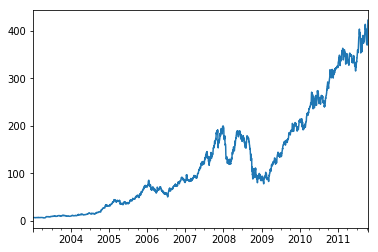

In [238]:
close_px.AAPL.plot()

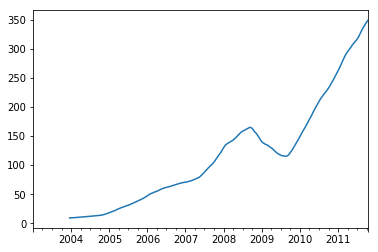

In [239]:
close_px.AAPL.rolling(250).mean().plot()

In [240]:
appl_std250 = close_px.AAPL.rolling(250,  min_periods=10).std()

In [241]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

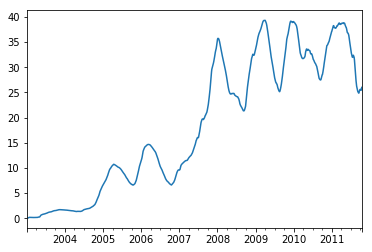

In [242]:
appl_std250.plot()

In [243]:
expanding_mean = appl_std250.expanding().mean()

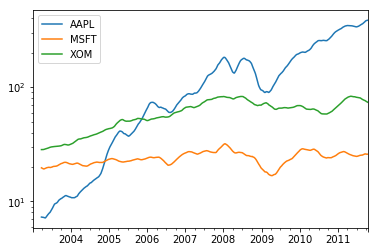

In [244]:
close_px.rolling(60).mean().plot(logy=True)

In [245]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


<p style="color:blue; font-size:18px;">Funções exponencialmente ponderadas</p>
<p style="color:red; font-size:10px;">pg 440</p>

In [250]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
2006-01-10     80.86
2006-01-11     83.90
2006-01-12     84.29
2006-01-13     85.59
2006-01-16     85.59
2006-01-17     84.71
2006-01-18     82.49
2006-01-19     79.04
2006-01-20     76.09
2006-01-23     77.67
2006-01-24     76.04
2006-01-25     74.20
2006-01-26     72.33
2006-01-27     72.03
2006-01-30     75.00
2006-01-31     75.51
2006-02-01     75.42
2006-02-02     72.10
2006-02-03     71.85
2006-02-06     67.30
2006-02-07     67.60
2006-02-08     68.81
2006-02-09     64.95
2006-02-10     67.31
               ...  
2007-11-20    168.85
2007-11-21    168.46
2007-11-22    168.46
2007-11-23    171.54
2007-11-26    172.54
2007-11-27    174.81
2007-11-28    180.22
2007-11-29    184.29
2007-11-30    182.22
2007-12-03    178.86
2007-12-04    179.81
2007-12-05    185.50
2007-12-06    189.95
2007-12-07    194.30
2007-12-10    194.21
2007-12-11    188.54
2007-12-12   

In [251]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ma60

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
2006-01-09           NaN
2006-01-10           NaN
2006-01-11           NaN
2006-01-12           NaN
2006-01-13           NaN
2006-01-16           NaN
2006-01-17           NaN
2006-01-18           NaN
2006-01-19           NaN
2006-01-20           NaN
2006-01-23           NaN
2006-01-24           NaN
2006-01-25           NaN
2006-01-26           NaN
2006-01-27     78.158500
2006-01-30     78.008095
2006-01-31     77.894545
2006-02-01     77.786957
2006-02-02     77.550000
2006-02-03     77.322000
2006-02-06     76.936538
2006-02-07     76.590741
2006-02-08     76.312857
2006-02-09     75.921034
2006-02-10     75.634000
                 ...    
2007-11-20    175.307000
2007-11-21    175.362667
2007-11-22    175.570333
2007-11-23    175.713333
2007-11-26    175.898667
2007-11-27    176.073000
2007-11-28    176.322000
2007-11-29    176.681667
2007-11-30    177.075000


In [252]:
ewma60 = aapl_px.ewm(span=30).mean()
ewma60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
2006-01-09     74.859024
2006-01-10     75.896932
2006-01-11     77.145698
2006-01-12     78.166996
2006-01-13     79.150958
2006-01-16     79.950115
2006-01-17     80.507644
2006-01-18     80.728233
2006-01-19     80.548765
2006-01-20     80.093788
2006-01-23     79.855407
2006-01-24     79.492441
2006-01-25     79.003919
2006-01-26     78.404534
2006-01-27     77.846161
2006-01-30     77.602477
2006-01-31     77.427025
2006-02-01     77.261930
2006-02-02     76.844719
2006-02-03     76.447500
2006-02-06     75.730780
2006-02-07     75.102414
2006-02-08     74.622252
2006-02-09     73.892783
2006-02-10     73.401672
                 ...    
2007-11-20    170.393741
2007-11-21    170.268984
2007-11-22    170.152275
2007-11-23    170.241806
2007-11-26    170.390076
2007-11-27    170.675233
2007-11-28    171.291024
2007-11-29    172.129668
2007-11-30    172.780657


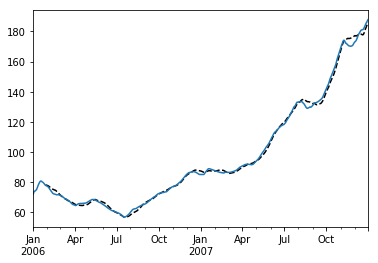

In [265]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(label='EW MA')

<p style="color:blue; font-size:18px;">Funções de janela móvel binárias</p>
<p style="color:red; font-size:10px;">pg 442</p>

In [266]:
spx_px = close_px_all['SPX']

In [267]:
spx_rets = spx_px.pct_change()

In [268]:
returns = close_px.pct_change()

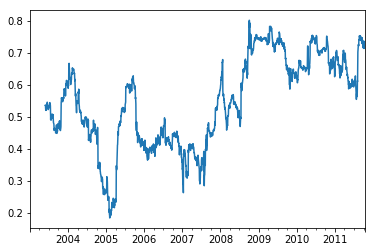

In [275]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

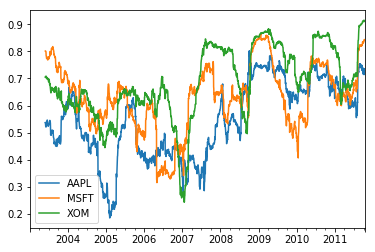

In [274]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<p style="color:blue; font-size:18px;">Funções de janela móvel definidas pelo usuário</p>
<p style="color:red; font-size:10px;">pg 444</p>

In [278]:
from scipy.stats import percentileofscore

In [279]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


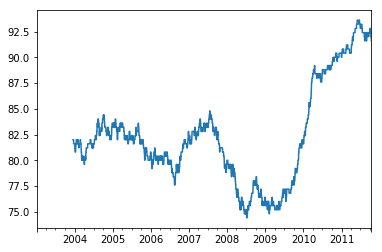

In [282]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()